# Preprocessed model

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

Keras

In [57]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

## Pickle handler

In [4]:
class ModelSaver:
    def __init__(self, name = 'model', model = None):
        self.model = model
        self.fileName = name + '.pickle'
    def save(self, model = None):
        if (model == None):
            model = self.model
        pickle.dump(model, open(self.fileName, 'wb'))
    def load(self):
        model = pickle.load(open(self.fileName, 'rb'))
        return model

## Loading up the data

In [5]:
path = './data/'
modelSaver = ModelSaver(path + 'preprocessed')

In [6]:
data = modelSaver.load()

In [7]:
data.keys()

dict_keys(['train', 'test', 'validation', 'labels'])

In [8]:
training = data['train']
testing = data['test']
validation = data['validation']

xTrain = training['x']
yTrain = to_categorical(training['y'], num_classes=43)

xTest = testing['x']
yTest = to_categorical(testing['y'], num_classes=43)

xValid = validation['x']
yValid = to_categorical(validation['y'], num_classes=43)

labels = data['labels']

In [9]:
def showImage(img):
    low, high = np.min(img), np.max(img)
    img = (img - low) / (high - low)
    plt.imshow(img.astype('float32'), cmap=plt.get_cmap('gray_r'))
    plt.show()

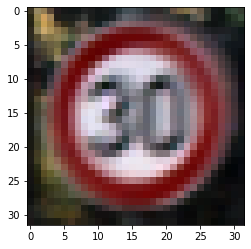

In [10]:
showImage(xTrain[0])

## Set up the model

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(43, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(xTrain, yTrain,
              batch_size=12, epochs = 5,
              validation_data = (xValid, yValid),
              verbose=2)

Train on 97997 samples, validate on 4000 samples
Epoch 1/5
 - 539s - loss: 0.3564 - accuracy: 0.8932 - val_loss: 0.4359 - val_accuracy: 0.8800
Epoch 2/5
 - 488s - loss: 0.1175 - accuracy: 0.9629 - val_loss: 0.5148 - val_accuracy: 0.8708
Epoch 3/5
 - 426s - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.5020 - val_accuracy: 0.9022
Epoch 4/5
 - 427s - loss: 0.0779 - accuracy: 0.9774 - val_loss: 0.7399 - val_accuracy: 0.8695
Epoch 5/5
 - 421s - loss: 0.0694 - accuracy: 0.9802 - val_loss: 0.6588 - val_accuracy: 0.8950


## Test and evaluation

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4096500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 43)               

In [24]:
score = model.evaluate(xTest, yTest, verbose=1)
print('Test accuracy: ', score[1])

12630/12630 [==============================] - 6s 457us/step
Test accuracy:  0.8998416662216187


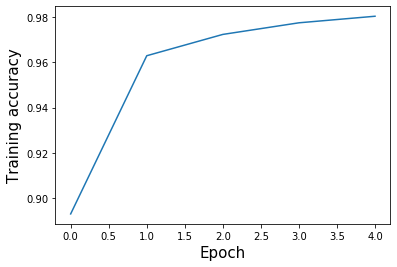

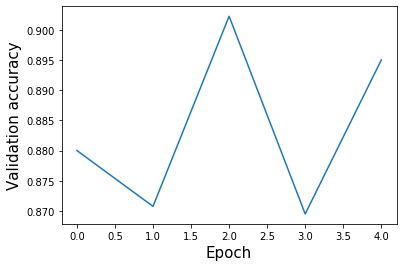

In [25]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Training accuracy', fontsize=15)
plt.show()
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)
plt.show()

In [52]:
def getPrediction(index):
    return np.argmax(model.predict(np.array([xTest[index]])))

def showPrediction(index):
    prediction = model.predict(np.array([xTest[index]]))[0]
    predictions = np.argsort(prediction)[::-1]
    print('Prediction: ', labels[predictions[0]])
    print('Actual: ', labels[data['test']['y'][index]])
    if (predictions[0] != data['test']['y'][index]):
        print('Correct guess was no.', np.where(predictions == data['test']['y'][index])[0][0] + 1)
        prediction = -np.sort(-prediction)
        print(prediction[0], prediction[1])
    showImage(xTest[index])

Prediction:  Speed limit (60km/h)
Actual:  Speed limit (60km/h)


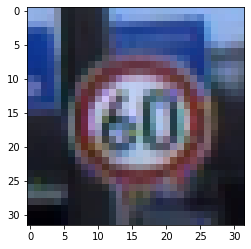

In [53]:
showPrediction(100)

Prediction:  Road narrows on the right
Actual:  Road work
Correct guess was no. 3
0.81313777 0.070057616


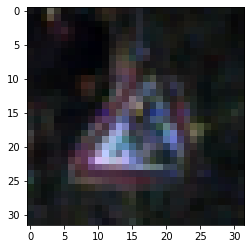

25
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 4
0.60159624 0.39670166


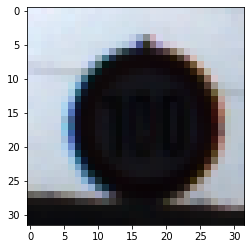

7
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 2
0.48212183 0.42675012


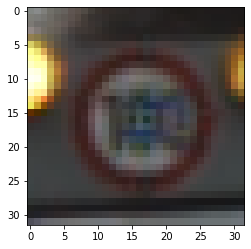

7
Prediction:  Speed limit (30km/h)
Actual:  Speed limit (70km/h)
Correct guess was no. 2
0.9671405 0.019667735


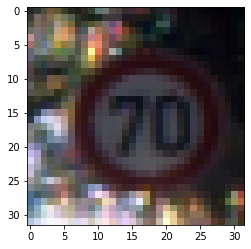

4
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (50km/h)
Correct guess was no. 3
0.981236 0.014556673


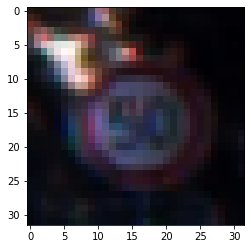

2
Prediction:  Speed limit (70km/h)
Actual:  Speed limit (50km/h)
Correct guess was no. 2
0.99916255 0.0008255571


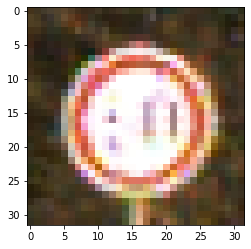

2
Prediction:  Speed limit (80km/h)
Actual:  No passing for vehicles over 3.5 metric tons
Correct guess was no. 2
0.5635721 0.43642774


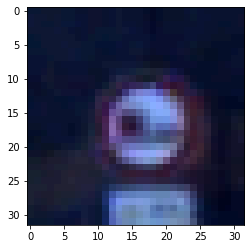

10
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (50km/h)
Correct guess was no. 2
0.99027026 0.0044194967


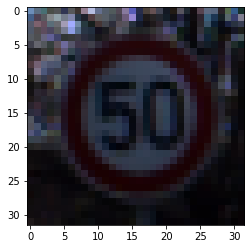

2
Prediction:  Dangerous curve to the left
Actual:  Double curve
Correct guess was no. 2
0.99951434 0.00030533315


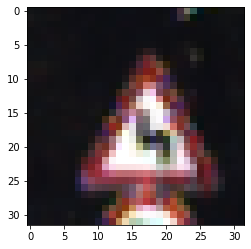

21
Prediction:  Speed limit (60km/h)
Actual:  Speed limit (80km/h)
Correct guess was no. 2
0.73218364 0.23525657


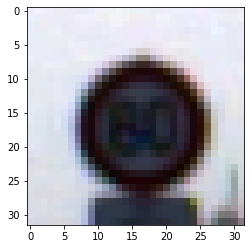

5
Prediction:  Priority road
Actual:  Ahead only
Correct guess was no. 2
0.93038154 0.055585347


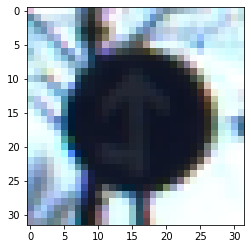

35
Prediction:  Speed limit (120km/h)
Actual:  Speed limit (20km/h)
Correct guess was no. 5
0.999998 1.3819212e-06


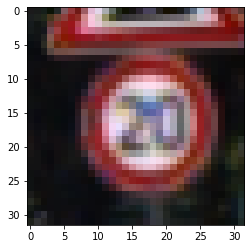

0
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (120km/h)
Correct guess was no. 2
0.6354861 0.35468608


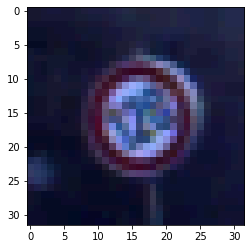

8
Prediction:  Speed limit (80km/h)
Actual:  Speed limit (100km/h)
Correct guess was no. 3
0.5915281 0.30809647


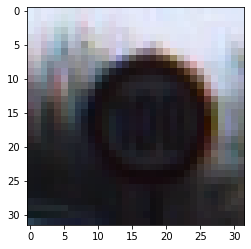

7
Prediction:  Beware of ice/snow
Actual:  Right-of-way at the next intersection
Correct guess was no. 2
0.69560134 0.30432564


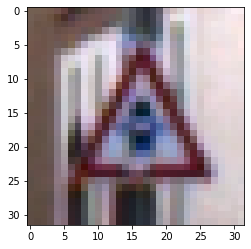

11
Prediction:  Speed limit (70km/h)
Actual:  Speed limit (30km/h)
Correct guess was no. 3
0.9998516 0.000142929


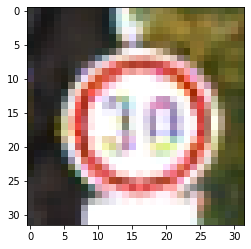

1


In [54]:
for i in range(0, 200):
    if (getPrediction(i) != data['test']['y'][i]):
        showPrediction(i)
        print(data['test']['y'][i])

## Saving the model

In [61]:
model.save('models/model4.h5')

## Load model

In [62]:
model = load_model('models/model4.h5')